<a href="https://colab.research.google.com/github/nmcphers128/DS5001_FINALProj_nhm5as/blob/main/finalProj_M6simNeils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJ Module 6: Similarity and Distance Measures

# Set Up

## Config

We define two OHCO lists, one to match the reduced TFIDF table we are importing, and the other to define the table after we compress this table to make clustering easier.

In [ ]:
OHCO_src = ['book_id', 'chap_num']
OHCO = ['book_id']
inputFilesDir = "/content/drive/MyDrive/DS5001_finalProj/outputFiles"
inputFilesDir += "/"

In [ ]:
# prompt: connect google drive

from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

## Import

In [ ]:
import pandas as pd
import numpy as np
import re
from numpy.linalg import norm
from scipy.spatial.distance import pdist

In [ ]:
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

# Prepare the Data

## Import tables

In [ ]:
TFIDF = pd.read_csv(inputFilesDir+'TFIDF.csv').set_index(OHCO_src)

In [ ]:
VOCAB = pd.read_csv(inputFilesDir+'VOCAB2.csv').set_index('term_id')


In [ ]:
LIB = pd.read_csv(inputFilesDir+'LIB2.csv').set_index('book_id')

In [ ]:
TFIDF.head(10)

1    2    3    4    5    6    7    8    9   10  ...  \
book_id chap_num                                                    ...   
35      1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        6         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        7         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        8         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        9         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        10        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                  31560  31561  31562  31563  31564  31565  31566  31567  \
book_id chap_num                                                           
35      1           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        2           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        3           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        4           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        5           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        6           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        7           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        8           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        9           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        10          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  31568  31569  
book_id chap_num                
35      1           0.0    0.0  
        2           0.0    0.0  
        3           0.0    0.0  
        4           0.0    0.0  
        5           0.0    0.0  
        6           0.0    0.0  
        7           0.0    0.0  
        8           0.0    0.0  
        9           0.0    0.0  
        10          0.0    0.0  

[10 rows x 31569 columns]

In [ ]:
LIB.head()

,book_title,author,book_file
book_id,,,
201,Flatland: A Romance of Many Dimensions,ABBOTT,./allBooks\ABBOTT_EDWIN_ABBOTT_FLATLAND_A_ROMA...
62,A Princess of Mars,BURROUGHS,./allBooks\BURROUGHS_EDGAR_RICE_A_PRINCESS_OF_...
64,The Gods of Mars,BURROUGHS,./allBooks\BURROUGHS_EDGAR_RICE_THE_GODS_OF_MA...
28554,Beyond Lies the Wub,DICK,./allBooks\DICK_PHILIP_K_BEYOND_LIES_THE_WUB-p...
32032,Second Variety,DICK,./allBooks\DICK_PHILIP_K_SECOND_VARIETY-pg3203...


In [ ]:
VOCAB.head()

,term_rank,term_str,n,num,stop,p_stem,pos_max,term_rank2,p,zipf_k,...,zipf_k3,h,df,idf,tfidf_mean,tfidf_sum,tfidf_median,tfidf_max,h2,x_factor
term_id,,,,,,,,,,,,,,,,,,,,,
27916,1,the,102867,0,1,the,DT,1,0.069984,102867,...,0.069986,0.268517,569,0.000763,0.000056,0.031611,0.000055,0.000305,8.725218,0.000000
1422,2,and,53070,0,1,and,CC,2,0.036105,106140,...,0.072213,0.173004,564,0.004596,0.000142,0.080280,0.000132,0.000361,8.234345,5.707613
19078,3,of,49979,0,1,of,IN,3,0.034002,149937,...,0.102011,0.165871,567,0.002292,0.000080,0.045139,0.000078,0.000573,8.715657,9.575128
28306,4,to,37763,0,1,to,TO,4,0.025691,151052,...,0.102769,0.135717,564,0.004596,0.000110,0.062296,0.000111,0.000320,8.480164,11.756004
460,5,a,32282,0,1,a,DT,5,0.021963,161410,...,0.109816,0.120988,566,0.003058,0.000069,0.039141,0.000067,0.000765,8.655956,13.931225


## Add Some Labels to the Library

In [ ]:
#LIB.loc[LIB.book_file.str.contains('WELLS'), 'author'] = 'wells'
#LIB.loc[LIB.book_file.str.contains('VERNE'), 'author'] = 'verne'
#LIB['author'] = LIB['author'].fillna('verne')
#LIB['title'] = LIB.book_title.str.split(', by').apply(lambda x: x[0])

In [ ]:
LIB

,book_title,author,book_file
book_id,,,
201,Flatland: A Romance of Many Dimensions,ABBOTT,./allBooks\ABBOTT_EDWIN_ABBOTT_FLATLAND_A_ROMA...
62,A Princess of Mars,BURROUGHS,./allBooks\BURROUGHS_EDGAR_RICE_A_PRINCESS_OF_...
64,The Gods of Mars,BURROUGHS,./allBooks\BURROUGHS_EDGAR_RICE_THE_GODS_OF_MA...
28554,Beyond Lies the Wub,DICK,./allBooks\DICK_PHILIP_K_BEYOND_LIES_THE_WUB-p...
32032,Second Variety,DICK,./allBooks\DICK_PHILIP_K_SECOND_VARIETY-pg3203...
31516,The Eyes Have It,DICK,./allBooks\DICK_PHILIP_K_THE_EYES_HAVE_IT-pg31...
41562,The Hanging Stranger,DICK,./allBooks\DICK_PHILIP_K_THE_HANGING_STRANGER-...
139,The Lost World,DOYLE,./allBooks\DOYLE_ARTHUR_CONAN_THE_LOST_WORLD-p...
10662,The Night Land,HODGSON,./allBooks\HODGSON_WILLIAM_HOPE_THE_NIGHT_LAND...


## Collapse TFIDF

We want to work with larger bags in this notebook, in order to better visualize our resulting clusters.

In [ ]:
TFIDF = TFIDF.groupby(OHCO).mean()

In [ ]:
TFIDF.head()

,1,2,3,4,5,6,7,8,9,10,...,31560,31561,31562,31563,31564,31565,31566,31567,31568,31569
book_id,,,,,,,,,,,,,,,,,,,,,
35,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000022,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000073,0.000023,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.000088,0.0,0.0,0.0,0.0,0.000076,0.000096,0.000022,0.000092,0.000085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a DOC table

We want to create a new table that maps the OHCO levels to a single doc_id. We do this so that when we create a table to store pairs of docs and their distances, we can use a single-valued ID for each docs.

This table will also be used to store cluster assignments.

All of this will become clearer below!

In [ ]:
DOC = TFIDF.reset_index()[OHCO] # We create a table from the OHCO in our TFIDF table

In [ ]:
DOC.head()

,book_id
0,35
1,36
2,62
3,64
4,83


In [ ]:
DOC.index.name = 'doc_id' # We give the new index a name

In [ ]:
DOC.head()

,book_id
doc_id,
0,35
1,36
2,62
3,64
4,83


## Add a meaningful Title to DOC index

In [ ]:
DOC['title'] = DOC.book_id.map(LIB.author) \
    + '-' + DOC[OHCO].apply(lambda x: x.astype('str').str.cat(sep='-'), 1) \
    + ': '+ DOC.book_id.map(LIB.book_title)

In [ ]:
DOC.head(4)

,book_id,title
doc_id,,
0,35,WELLS-35: The Time Machine
1,36,WELLS-36: The War of the Worlds
2,62,BURROUGHS-62: A Princess of Mars
3,64,BURROUGHS-64: The Gods of Mars


In [ ]:
DOC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   book_id  25 non-null     int64 
 1   title    25 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


## Create Normalized Tables

In [ ]:
L0 = TFIDF.astype('bool').astype('int')
L1 = TFIDF.apply(lambda x: x / x.sum(), 1)
L2 = TFIDF.apply(lambda x: x / norm(x), 1)

In [ ]:
#((L2.T)**2).sum()

## Create Doc Pair Table

Create a table to store our results.

Note that `pist()` is a "distance matrix computation from a collection of raw observation vectors stored in a rectangular array".

In [ ]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([DOC.index.tolist(), DOC.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

In [ ]:
PAIRS.shape

(300, 0)

In [ ]:
#PAIRS.head(30)

# Compute Distances

In [ ]:
%time PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')

CPU times: user 17 ms, sys: 2.19 ms, total: 19.2 ms
Wall time: 19.6 ms


In [ ]:
%time PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')

CPU times: user 10.5 ms, sys: 3 ms, total: 13.5 ms
Wall time: 18.8 ms


In [ ]:
%time PAIRS['cosine'] = pdist(TFIDF, 'cosine')

CPU times: user 10.1 ms, sys: 1.1 ms, total: 11.2 ms
Wall time: 9.75 ms


In [ ]:
%time PAIRS['jaccard'] = pdist(L0, 'jaccard') # Fast, and similar to js

CPU times: user 34.6 ms, sys: 0 ns, total: 34.6 ms
Wall time: 35.1 ms


In [ ]:
%time PAIRS['dice'] = pdist(L0, 'dice')

CPU times: user 15.9 ms, sys: 841 µs, total: 16.8 ms
Wall time: 17.1 ms


In [ ]:
%time PAIRS['js'] = pdist(L1, 'jensenshannon') # Turns out to be really slow

CPU times: user 103 ms, sys: 0 ns, total: 103 ms
Wall time: 105 ms


In [ ]:
%time PAIRS['euclidean2'] = pdist(L2, 'euclidean') # Should be the same as cosine (colinear)

CPU times: user 9.17 ms, sys: 1 µs, total: 9.17 ms
Wall time: 9.76 ms


In [ ]:
# %time PAIRS['js2'] = pdist(TFIDF, 'jensenshannon')

In [ ]:
PAIRS.head()

cityblock  euclidean    cosine   jaccard      dice        js  \
doc_a doc_b                                                                 
0     1       0.582933   0.012148  0.690737  0.673781  0.508047  0.602052   
      2       0.631122   0.013793  0.778265  0.709984  0.550368  0.642140   
      3       0.634077   0.014192  0.801791  0.717868  0.559902  0.647303   
      4       0.713136   0.016334  0.864591  0.744468  0.592951  0.668074   
      5       0.602872   0.012496  0.748128  0.706848  0.546608  0.621919   

             euclidean2  
doc_a doc_b              
0     1        1.175362  
      2        1.247610  
      3        1.266326  
      4        1.314984  
      5        1.223216

## Compare Distributions

In [ ]:
if PAIRS.shape[0] > 1000:
    SAMPLE = PAIRS.sample(1000)
else:
    SAMPLE = PAIRS

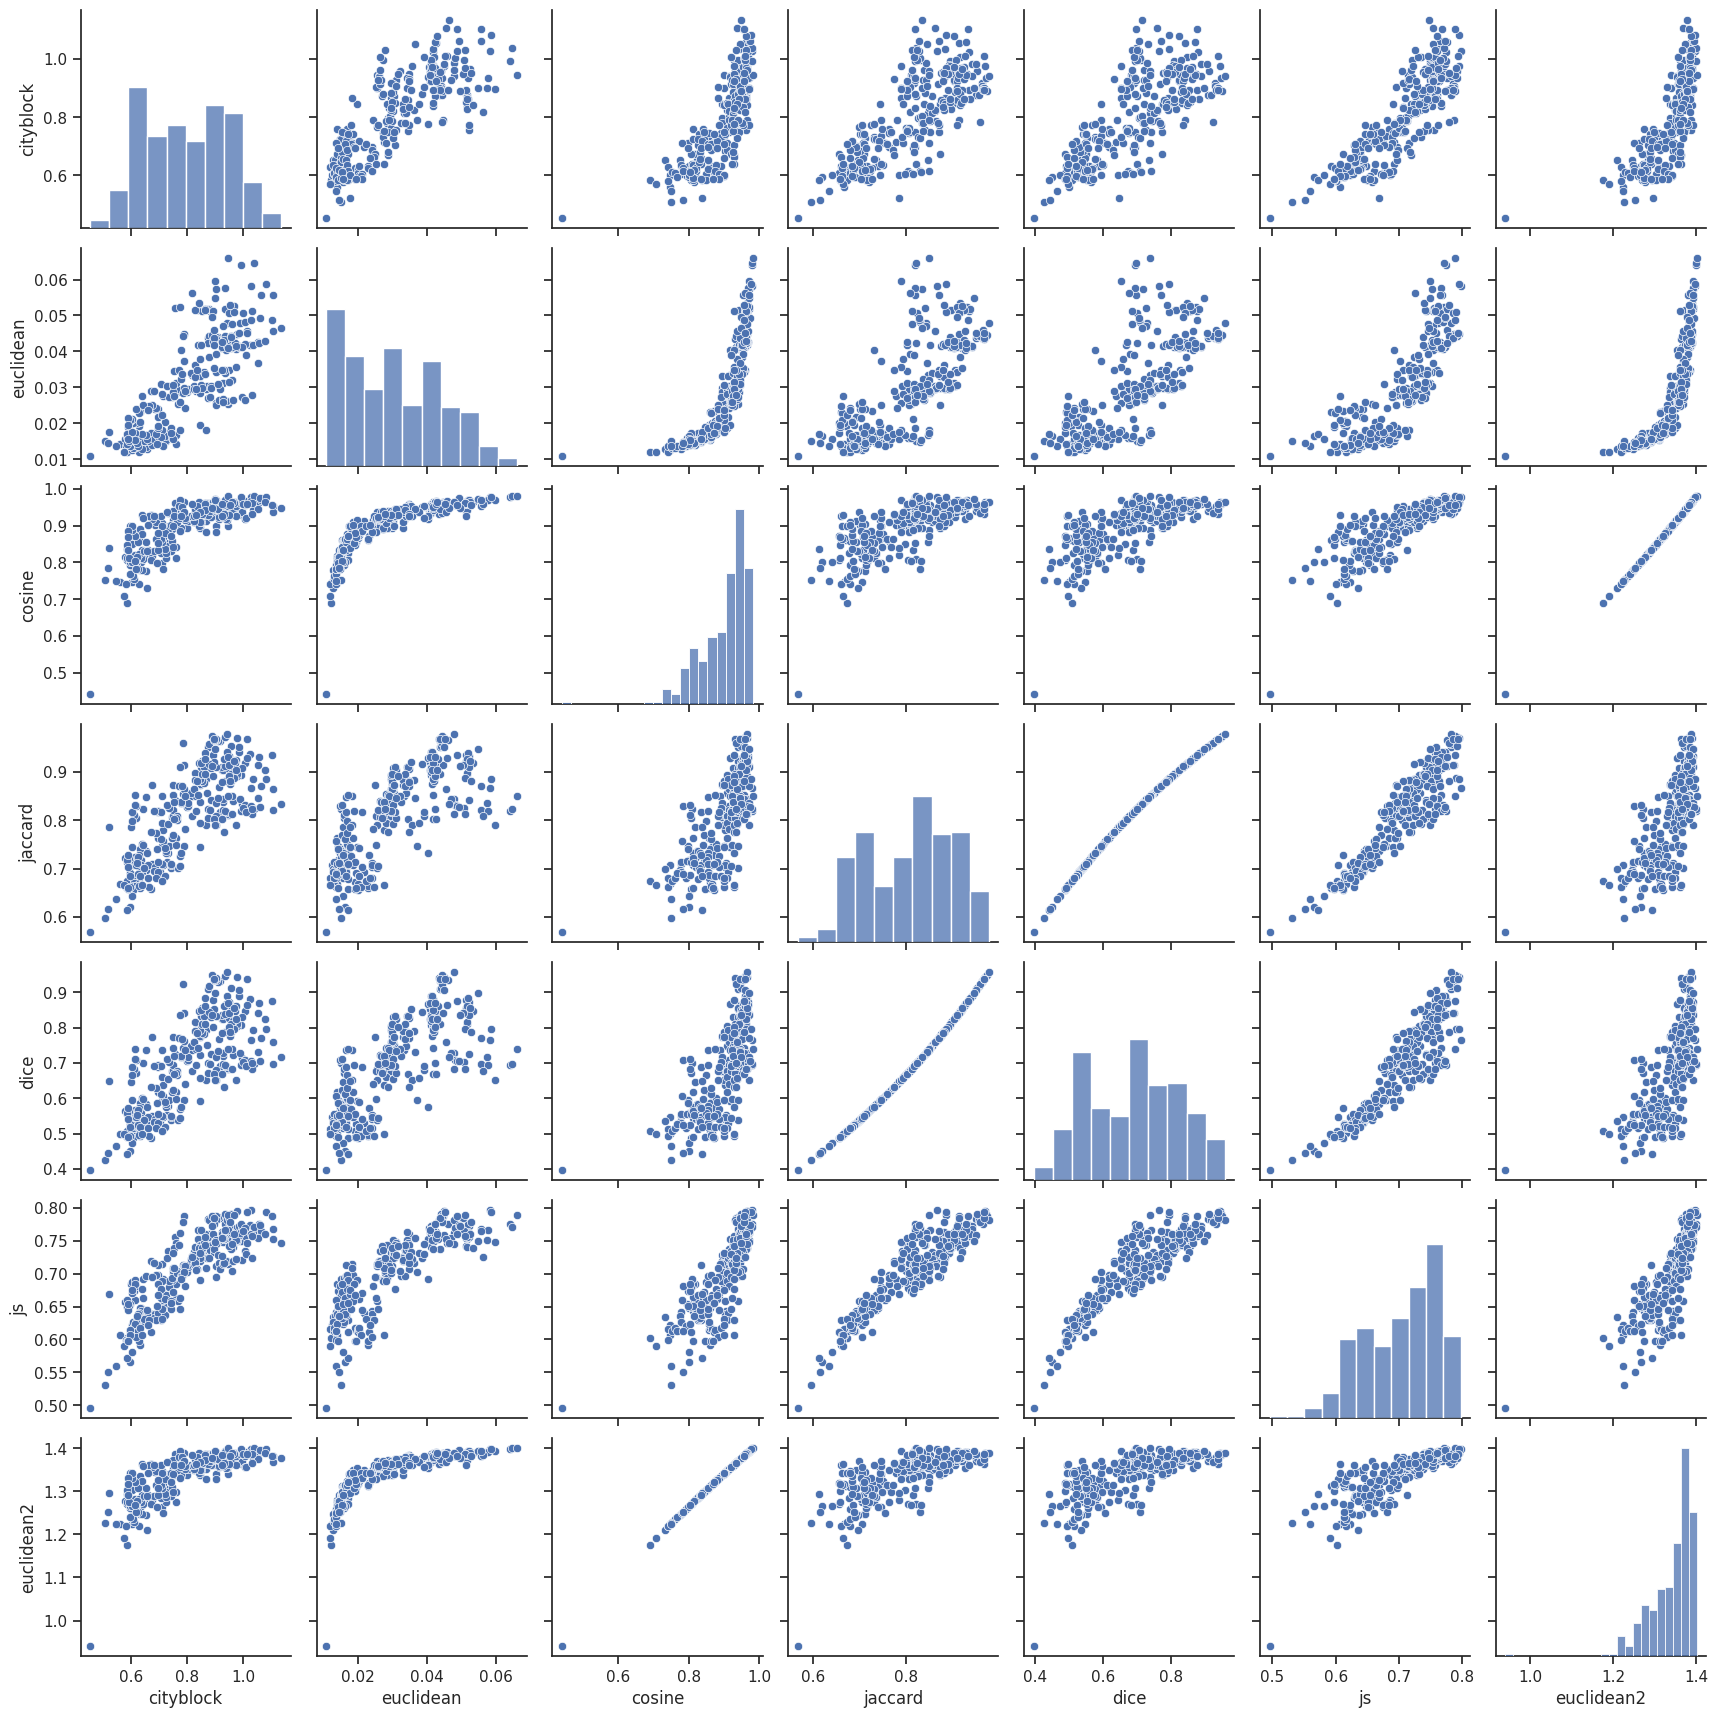

In [ ]:
sns.pairplot(SAMPLE)

In [ ]:
PAIRS.sort_values('cosine').head(20).style.background_gradient('YlGn')

In [ ]:
# def get_comps(doc_id):
#     idx = pd.IndexSlice
#     a = PAIRS.loc[idx[doc_id, :], :]
#     b = PAIRS.loc[idx[:, doc_id], :]
#     return pd.concat([a,b])

# Create Clusters

## Hiearchical

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [ ]:
def hca(sims, linkage_method='ward', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = DOC.title.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree,
                                labels=labels,
                                orientation="left",
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 640x480 with 0 Axes>

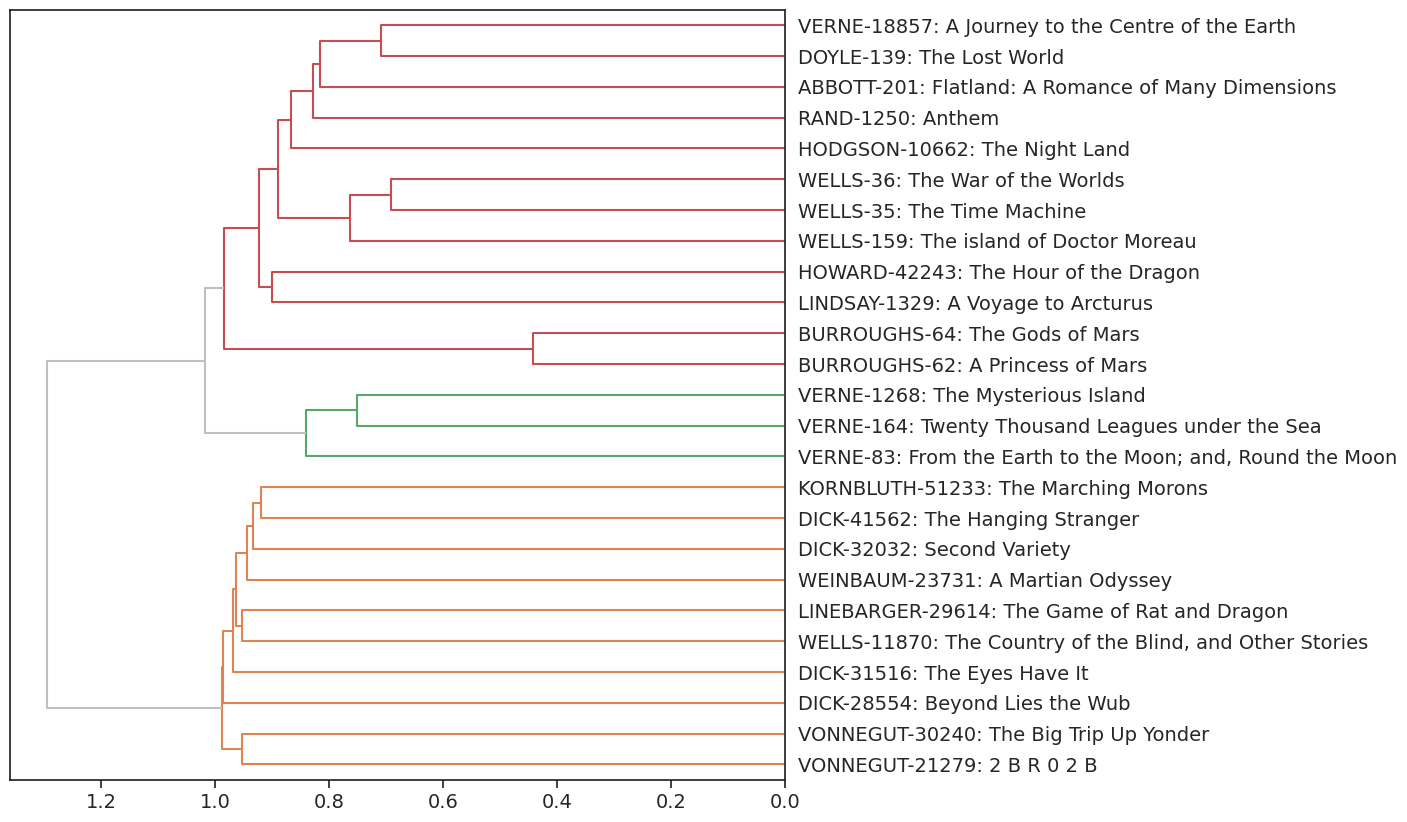

In [ ]:
hca(PAIRS.cosine, color_thresh=1)

<Figure size 640x480 with 0 Axes>

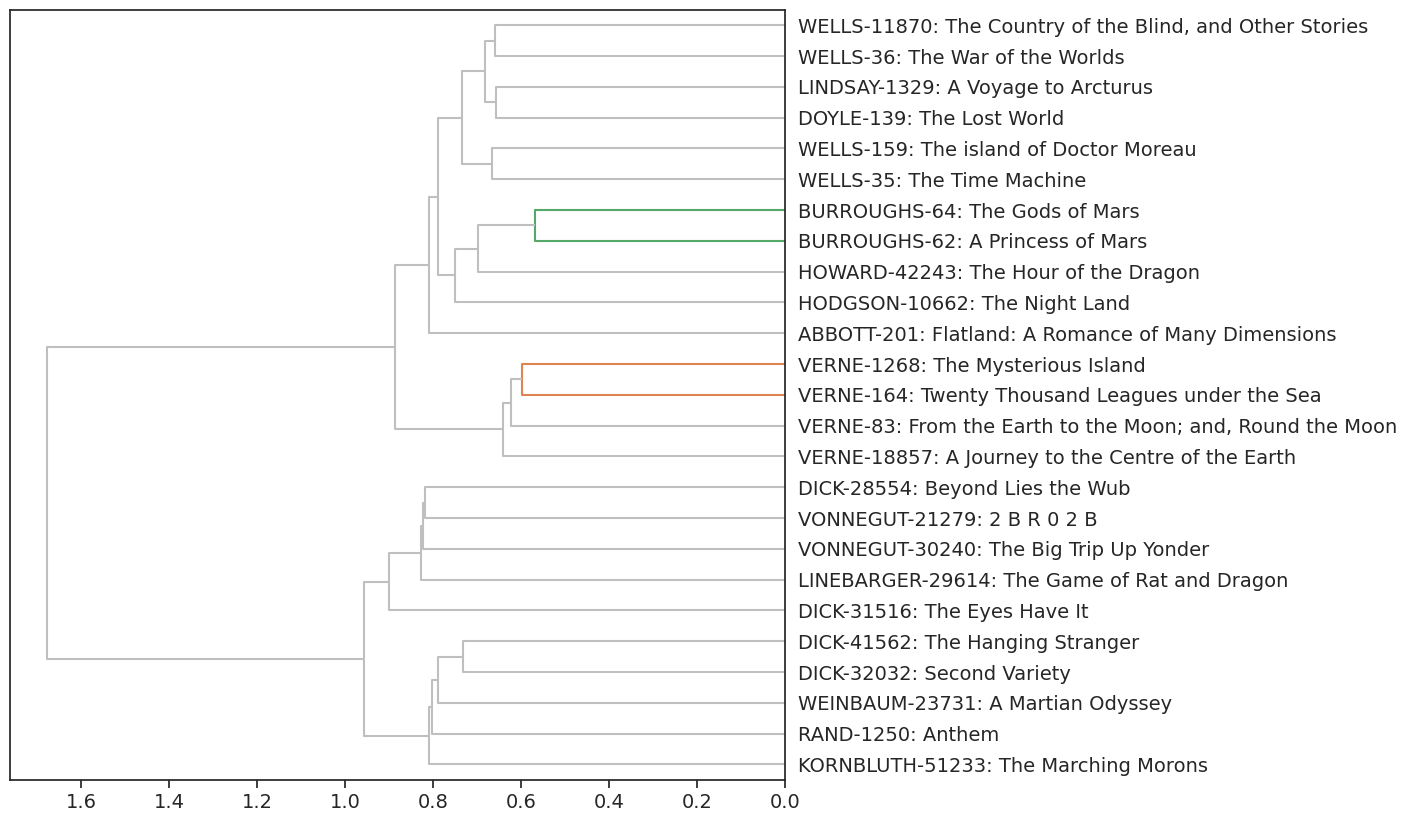

In [ ]:
hca(PAIRS.jaccard, color_thresh=.6)

<Figure size 640x480 with 0 Axes>

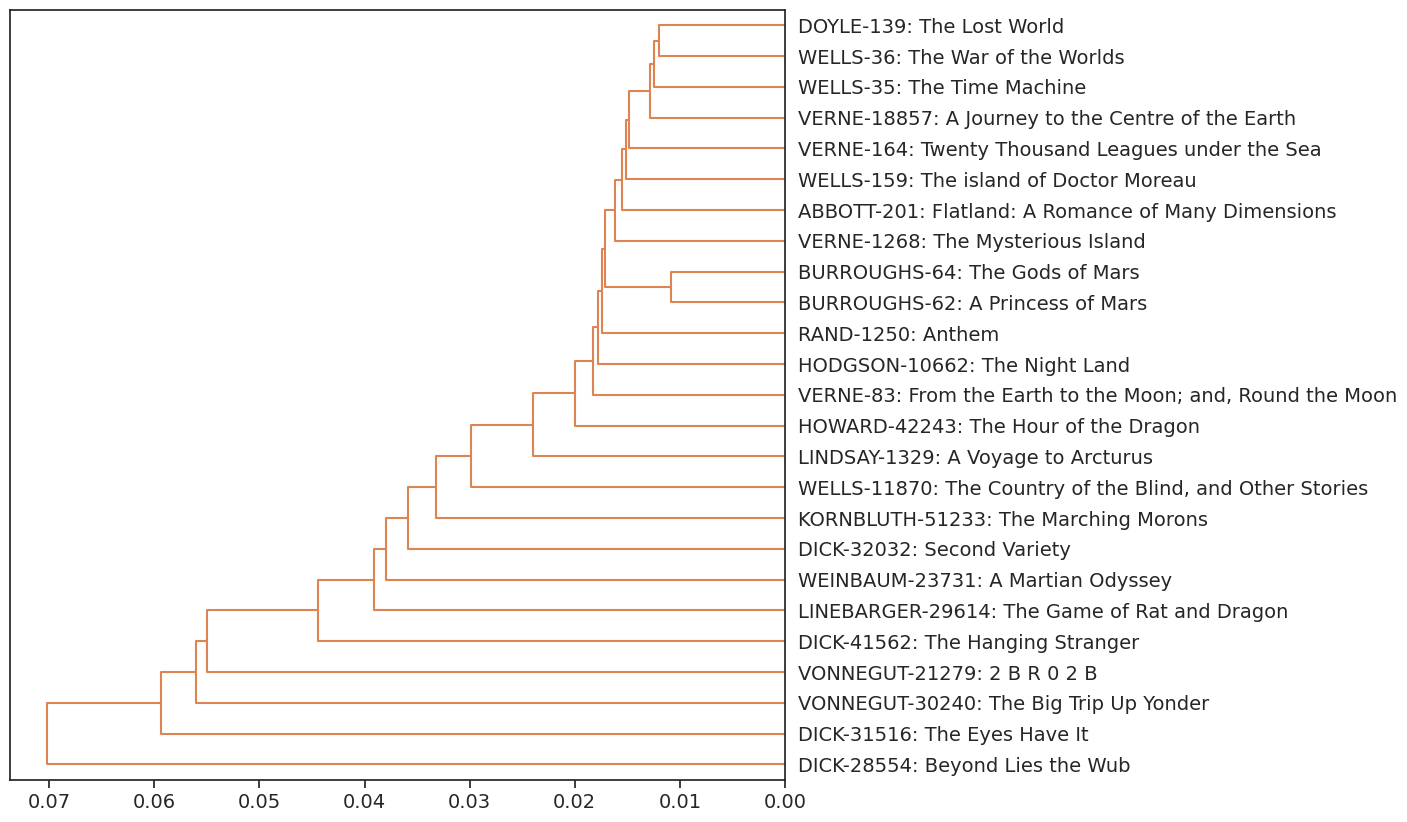

In [ ]:
hca(PAIRS.euclidean, color_thresh=.3)

<Figure size 640x480 with 0 Axes>

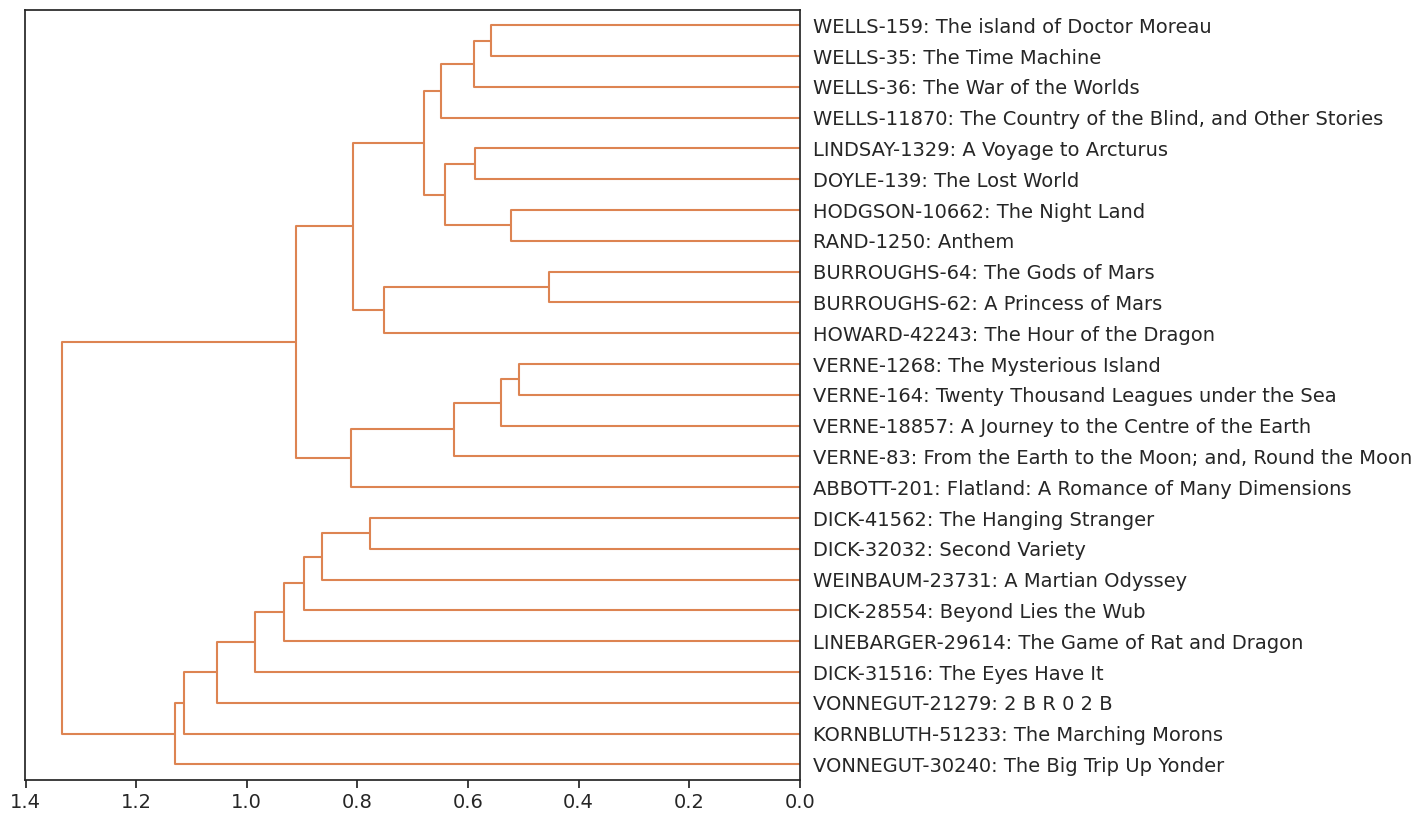

In [ ]:
hca(PAIRS.cityblock, color_thresh=8)

<Figure size 640x480 with 0 Axes>

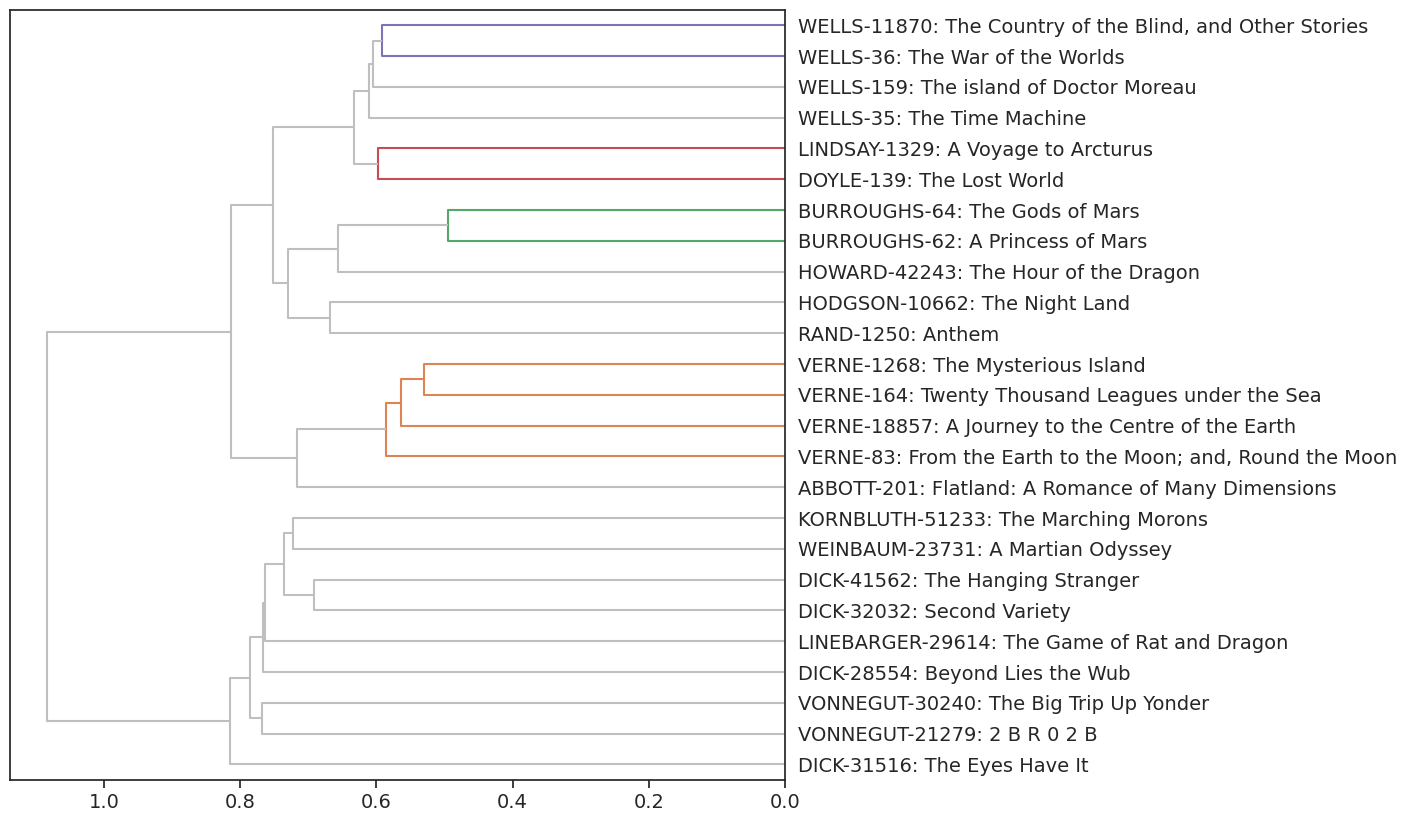

In [ ]:
hca(PAIRS.js, color_thresh=.6)

## K-Means

K-Means *only* uses Euclidean distance. Why?

* The K-Means procedure does not explicitly use pairwise distances between data points.
* Instead, it repeatedly assigns points to the closest centroid thereby using Euclidean distance from data points to a centroid.
* However, K-Means is *implicitly* based on pairwise Euclidean distances between data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points.
* The term "centroid" is itself from Euclidean geometry. It is multivariate mean in Euclidean space. Euclidean space is about euclidean distances. Non-Euclidean distances will generally not span Euclidean space. That's why K-Means is for Euclidean distances only.

See the [Cross Validated](https://stats.stackexchange.com/questions/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric) post on this.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
n_clusters = 5

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  ## to suppress K means warnings of mem leakage?
DOC['y_raw'] = KMeans(n_clusters, n_init = 10).fit_predict(TFIDF)
DOC['y_L0'] = KMeans(n_clusters,n_init = 10).fit_predict(L0)
DOC['y_L1'] = KMeans(n_clusters,n_init = 10).fit_predict(L1)
DOC['y_L2'] = KMeans(n_clusters,n_init = 10).fit_predict(L2)

In [ ]:
DOC.sort_values('y_raw').style.background_gradient(cmap='viridis')

,book_id,title,y_raw,y_L0,y_L1,y_L2
doc_id,,,,,,
15,21279,VONNEGUT-21279: 2 B R 0 2 B,0,2,1,2
17,28554,DICK-28554: Beyond Lies the Wub,1,2,2,4
20,31516,DICK-31516: The Eyes Have It,2,2,4,3
19,30240,VONNEGUT-30240: The Big Trip Up Yonder,3,2,3,1
0,35,WELLS-35: The Time Machine,4,1,0,1
22,41562,DICK-41562: The Hanging Stranger,4,2,0,1
21,32032,DICK-32032: Second Variety,4,2,0,1
18,29614,LINEBARGER-29614: The Game of Rat and Dragon,4,2,0,3
16,23731,WEINBAUM-23731: A Martian Odyssey,4,2,0,1
